# Project 3: Data Wrangling with WERATEDOGS
## Table of Contents
<ol>
<li><a href="#intro"> Introduction</a></li>
      &nbsp; &emsp; <a href="#1"> a. Goal of project </a>
  <br>&nbsp; &emsp; <a href="#2">b. Dataset source </a>
  <br>&nbsp; &emsp; <a href="#3">b. Dataset overview </a>
<li><a href="#wrangling"> Data Wrangling</a></li>
      &nbsp; &emsp; <a href="#4">a. Gathering data </a>
  <br>&nbsp; &emsp; <a href="#5">b. Assessing data </a>
  <br>&nbsp; &emsp; <a href="#6">c. Cleaning data </a>
  <br>&nbsp; &emsp; <a href="#7">d. Storing data </a>
<li><a href="#eda"> Exploratory Data Analysis</a></li>
      &nbsp; &emsp; <a href="#8">a. Research Question 1 </a>
  <br>&nbsp; &emsp; <a href="#9">b. Research Question 2 </a>
  <br>&nbsp; &emsp; <a href="#10">c. Research Question 3 </a>
  <br>&nbsp; &emsp; <a href="#11">d. Research Question 4 </a>
  <br>&nbsp; &emsp; <a href="#12">e. Research Question 5 </a>
<li><a href="#conclusions"> Conclusions</a></li>
   

<a id='intro'></a>
## 1. Introduction
### a. Goal of project

- In this project, we will gather data from a variety of sources and file formats and then assess data visually and programmatically for quality and tidiness. After assessing the datas, we will make it clean, merge them into 1 file and store the clean_data into a csv file. Not only so, we will process on our wrangled data to produce the insights of data.


- Some questions  the insights of these datasets:

  - <a href="#8"> Question 1:</a> Which is the most favourite name? Change in Name over time, relationship between name with rating_numerator, favorite_count, reteet_count?
  
  - <a href="#9"> Question 2:</a> Stage and its relationship with tweet number, favorite_count and retweet
  
  - <a href="#10"> Question 3:</a> favourite breed? Its relationship with rating_numerator, favorite_count, retweet_count
   
  - <a href="#11"> Question 4:</a> Relationship between Favorite_Count, Retweet_Count and rating_numerator
   
  - <a href="#12"> Question 5:</a> Which time are tweets posted or retweeted, or marked favorite?



### b. Datasets overview

We have 3 datasets `twitter-archive-enhanced.csv`, `image_predictions.tsv` and `tweet_json.txt` with 3 different file formats (`csv`, `tsv`, `json.txt`) to read 

#### Data source
- **Dataset 1: twitter-archive-enhanced.csv**
   - Source: Download directly from the link given on Udacity
   - Method of gathering: Manual download to get file `twitter-archive-enhanced.csv`
- **Dataset 2: image_predictions.tsv**
   - Source: From the link given by Udacity (actually we can download it directly)
   - Method of gathering: Programmatical download via Requests to get file `image_predictions.tsv`
- **Dataset 3: tweet_json.txt**
   - Source: Twitter API 
   - Method of gathering: using Tweepy with `twitter_api.py` from Udacity


<a id='wrangling'></a>
## 2. Data Wrangling
<a id='4'></a>    
### a. Data Gathering

In [1]:
import re
import requests
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
# Read data csv with read_csv
tweets_data = pd.read_csv('twitter-archive-enhanced-2.csv', encoding='utf8')

In [3]:
# Using request to get file then save file as image_predictions.tsv
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open ('image_predictions.tsv', 'wb') as file:
    file.write(r.content)
#reading file tsv
image_predictions0 = pd.read_csv('image_predictions.tsv', sep='\t', encoding = 'utf8')

In [4]:
#Using tweepy to get the last Dataset tweet_json.txt. Note that I try to understand the code 
#and copy the code here like #the requirement of project. Actually I use the data from Udacity to process this project.


In [5]:
#Reading the tweet-json file
dt = []
with open('tweet-json.txt', 'r') as f:
    for line in f:
        try: 
            data = json.loads(line)
            dt.append({
                'tweet_id': data['id'],
                'retweet_count': data['retweet_count'],
                'favorite_count': data['favorite_count'] })               
        except:
            print('Error.....') 
retweets = pd.DataFrame(dt, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
retweets.head(3)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461


<a id='5'></a>
### b. Data Assessing
#### Dataset 1: twitter-archive-enhanced-2.csv

In [6]:
print('#####    Data Overview   ######\n')
tweets_data = pd.read_csv('twitter-archive-enhanced-2.csv', encoding='utf8')
tweets_data.info()

#####    Data Overview   ######

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object

In [7]:
print('Quality issues: incorrect name i.e `a`, `an`, `the\n')
dognames = list(tweets_data.name)
empty = []
for element in dognames:
    z = re.match('([a-z]+)', element)
    if z:
        empty.append(z.groups())
print(pd.Series(empty).value_counts().nlargest(5))


Quality issues: incorrect name i.e `a`, `an`, `the

(a,)       55
(the,)      8
(an,)       7
(very,)     5
(just,)     4
dtype: int64


In [8]:
pd.set_option('display.max_colwidth', 1000)
print('Quality issues 2: having 2 name but only 1 name appears')
tweets_data.iloc[[443, 1036, 2096],[5,12 ]]

Quality issues 2: having 2 name but only 1 name appears


,text,name
443,Say hello to Anna and Elsa. They fall asleep in similar positions. It's pretty wild. Both 12/10 would snug simultaneously https://t.co/8rUL99bX4W,Anna
1036,Say hello to Indie and Jupiter. They're having a stellar day out on the boat. Both 12/10 adorbz af https://t.co/KgSEkrPA3r,Indie
2096,Say hello to Gin &amp; Tonic. They're having a staring contest. Very very intense. 9/10 for both https://t.co/F6bI9dF16E,Gin


In [9]:
print('Quality issues: incorrect rating_numerator')
tweets_data.iloc[[45, 763, 1689],[5,10,11]]

Quality issues: incorrect rating_numerator


,text,rating_numerator,rating_denominator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10


In [10]:
print('Tidiness issue: a dog having 2 stages \n')
tweets_data.iloc[[200,201],[12,13,14,15]]

Tidiness issue: a dog having 2 stages 



,name,doggo,floofer,pupper
200,None,doggo,floofer,None
201,Alice,None,None,None


#### Dataset 2: image-predictions-3.tsv

In [11]:
image_predictions0 = pd.read_csv('image_predictions.tsv', sep='\t', encoding = 'utf8')
image_predictions0.info()
image_predictions0.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


#### Dataset 3:tweet-json.txt

In [12]:
retweets.info()
retweets.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819


<a id='5'></a>
## Assessing data
##### Dataset 1: twitter-archive-enhanced-2.csv
   - **Tidiness issues**
        - Tidiness issues 1: Column headers are values, not variable names such as `doggo`, `floofer`, `pupper` and `puppo` should be stored in 1 colummn.
   - **Quality issues**
        - Quality issue 1: Some dog names incorrect, i.e. 'such', or 'actually',
        - Quality issue 2: Some rows `text` show that there are more than 1 dog mentioned. Some of their names are missing (Quality issue 2).
        - Quality issue 3: One tweet has no rating associated with it (rating numerators in text contain decimals).
        - Quality issue 4: Missing/incorrect `rating_numerator`.
        - Quality issue 5: `rating_numerator`for 2 dogs needs to be considered.
        - Quality issue 6: `rating_denominator` must be equal 10. Another value is not correct.
        - Quality issue 7: `rating_numerator` too high.
        - Quality issue 8: Column `timestamp` is not object type. It needs to be changed into datetime type.


#### Dataset 2: image-predictions-3.tsv
  - **Tidiness issues**
      - Tidiness issues 2: 9 of the columns predicting the dog type will be reduced to `breed_prediction`. Because we do not tend to analyze weather people post a real dog or not, so we will not take columns of `conf` into consideration.
  - **Quality issues**
      - Quality issue 9: value in 'breed_prediction' mixing with _, - , lower case, upper case


##### Dataset 3: tweet-json.txt
  - **Tidiness issues**       
    - Tidiness issues 3: **Join** with Dataset 1 & 2 on `tweet_id`
     


<a id='6'></a>
### c. Data Cleaning
#### Dataset 1: twitter-archive-enhanced-2.csv
   - **Tidiness issues**
       - Definition: Column headers are values, not variable names such as `doggo`, `floofer`, `pupper` and `puppo` should be stored in 1 column (Tidiness issues 1).
 

In [13]:
tweets_data_clean = tweets_data[['tweet_id', 'timestamp', 'text', 'rating_numerator','rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo', 'retweeted_status_id','expanded_urls']]
pd.options.display.float_format = '{:.2f}'.format

In [14]:
# Creating stages, and droping 'doggo','floofer','pupper','puppo'
tweets_data_lite=tweets_data_clean.copy()
tweets_data_lite['stage']=tweets_data_lite[['doggo','floofer','pupper','puppo']].replace('None','').sum(1)
tweets_data_lite.loc[tweets_data_lite['stage'] == 'doggopupper', 'stage'] = 'doggo, pupper'
tweets_data_lite.loc[tweets_data_lite['stage'] == 'doggopuppo', 'stage'] = 'doggo, puppo'
tweets_data_lite.loc[tweets_data_lite['stage'] == 'doggofloofer', 'stage'] = 'doggo, floofer'
tweets_data_lite.stage.value_counts()
tweets_data_lite=tweets_data_lite.drop(columns=['doggo','floofer','pupper','puppo'])
tweet_data_clean=tweets_data_lite.copy()

In [15]:
#Test
print('After cleaning 1 we have stage column with values:\n',tweets_data_lite.stage.value_counts())
print('\nAfter cleaning 1 we have columns :\n',tweets_data_lite.columns)

After cleaning 1 we have stage column with values:
                   1976
pupper             245
doggo               83
puppo               29
doggo, pupper       12
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: stage, dtype: int64

After cleaning 1 we have columns :
 Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'retweeted_status_id', 'expanded_urls',
       'stage'],
      dtype='object')


   - **Quality issues**
        - Some dog names incorrect, i.e. 'such', or 'actually'(Quality issue 1).
        - Some rows `text` show that there are more than 1 dog mentioned. Some of their names are missing (Quality issue 2).
        - One tweet has no rating associated with it (rating numerators in text contain decimals) (Quality issue 3).
        - Missing/incorrect `rating_numerator`. `rating_numerator` >14 is incorrect (Quality issue 4).
        - `rating_numerator`for 2 dogs needs to be considered (Quality issue 5). 
        - `rating_denominator` must be equal 10. Another value is not correct (Quality issue 6).
        - Column `timestamp` is not object type. It needs to be changed into datetime type (Quality issue 7).

In [16]:
# Quality issue 1: Some dog names incorrect, i.e. 'such', or 'actually'

dognames = list(tweets_data_lite.name)
empty = []

for element in dognames:
    z = re.match('([a-z]+)', element)
    if z:
        empty.append(z.groups())
# converting unreasonable names into None
non_name=['a','the','an','very', 'one', 'quite', 'just', 'actually', 'not', 'getting', 'mad', 'by', 'such', 'infuriating', 'light', 'his', 
          'space', 'old', 'incredibly', 'unacceptable', 'this', 'life', 'my', 'all', 'officially','None']
for i in non_name:
    tweets_data_lite.loc[tweets_data_lite.name == i, 'name'] = np.nan

In [17]:
# Test Issue 1:
tweet_data_clean=tweets_data_lite.copy()
tweet_data_clean[tweet_data_clean['name']== 'the']

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweeted_status_id,expanded_urls,stage


In [18]:
tweet_data_clean.iloc[[1421,1366],]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweeted_status_id,expanded_urls,stage
1421,698195409219559425,2016-02-12 17:22:12 +0000,Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https://t.co/GPaoH5qWEk,9,10,Beau,nan,https://twitter.com/dog_rates/status/698195409219559425/photo/1,
1366,702671118226825216,2016-02-25 01:47:04 +0000,Meet Rambo &amp; Kiwi. Rambo's the pup with the sharp toes &amp; rad mohawk. One stays woke while one sleeps. 10/10 for both https://t.co/MpH1Fe9LhZ,10,10,Rambo,nan,https://twitter.com/dog_rates/status/702671118226825216/photo/1,


In [19]:
#Quality issue 2: Some rows `text` show that there are more than 1 dog mentioned. Some of their names are missing
#find all text likely has 2 names
multiple_names = r'(?:Say hello to|This is|These two dogs are|Meet|Here we have|Their names are)\s(?P<name1>[A-Z][a-z]*)\s(?:and|&amp;)?\s(?P<name2>[A-Z][a-z]*)?(?:\s[A-Z][a-z]*\.)?'
dog_names_added = tweets_data_lite['text'].str.extract(multiple_names)

#creating column is_one_dog
dog_names_added['is_one_dog'] = dog_names_added['name2'].isna()
dog_names_added['name2'].fillna(value='', inplace=True)
dog_names_added.is_one_dog.value_counts()

#creating column connector
dog_names_added['connector'] = np.where(dog_names_added['is_one_dog'] == False, " & ", "")
dog_names_added['name'] = dog_names_added['name1'] + dog_names_added['connector'] + dog_names_added['name2']
dog_names_added.drop(columns=['name1', 'name2', 'connector'], inplace=True)
#tweets_data_lite.drop(columns='name', inplace=True)
tweets_data_lite = tweets_data_lite.join(dog_names_added, rsuffix='1')
tweets_data_lite.update(dog_names_added['name'])
tweets_data_lite.drop(columns='name1')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweeted_status_id,expanded_urls,stage,is_one_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,nan,https://twitter.com/dog_rates/status/892420643555336193/photo/1,,True
1,892177421306343426,2017-08-01 00:17:27 +0000,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,nan,https://twitter.com/dog_rates/status/892177421306343426/photo/1,,True
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,nan,https://twitter.com/dog_rates/status/891815181378084864/photo/1,,True
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,nan,https://twitter.com/dog_rates/status/891689557279858688/photo/1,,True
4,891327558926688256,2017-07-29 16:00:24 +0000,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,nan,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",,True
5,891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13,10,NaN,nan,https://twitter.com/dog_rates/status/891087950875897856/photo/1,,True
6,890971913173991426,2017-07-28 16:27:12 +0000,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,13,10,Jax,nan,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",,True
7,890729181411237888,2017-07-28 00:22:40 +0000,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,13,10,NaN,nan,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",,True
8,890609185150312448,2017-07-27 16:25:51 +0000,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,13,10,Zoey,nan,https://twitter.com/dog_rates/status/890609185150312448/photo/1,,True
9,890240255349198849,2017-07-26 15:59:51 +0000,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,14,10,Cassie,nan,https://twitter.com/dog_rates/status/890240255349198849/photo/1,doggo,True


In [20]:
#Test issues 2
tweet_data_clean=tweets_data_lite.copy()
tweets_data_lite.iloc[[1421,1366],]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweeted_status_id,expanded_urls,stage,is_one_dog,name1
1421,698195409219559425,2016-02-12 17:22:12 +0000,Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https://t.co/GPaoH5qWEk,9,10,Beau & Wilbur,nan,https://twitter.com/dog_rates/status/698195409219559425/photo/1,,False,Beau & Wilbur
1366,702671118226825216,2016-02-25 01:47:04 +0000,Meet Rambo &amp; Kiwi. Rambo's the pup with the sharp toes &amp; rad mohawk. One stays woke while one sleeps. 10/10 for both https://t.co/MpH1Fe9LhZ,10,10,Rambo & Kiwi,nan,https://twitter.com/dog_rates/status/702671118226825216/photo/1,,False,Rambo & Kiwi


In [21]:
# Quality issue 3: One tweet has no rating associated with it (rating numerators in text contain decimals).
tweet_data_clean.iloc[[45, 340, 695, 763],].sample(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweeted_status_id,expanded_urls,stage,is_one_dog,name1
340,832215909146226688,2017-02-16 13:11:49 +0000,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10,Logan,786709082849828864.00,https://twitter.com/dog_rates/status/786709082849828864/photo/1,,True,NaN


In [22]:
rating_decimal = tweets_data_lite['text'].str.extract( r'(?:(?P<rating_numerator>\d+\.\d+)\/(?:\d+))', expand=True)
rating_decimal.rating_numerator.value_counts() 
print('Index having decimal rating:', rating_decimal.index[rating_decimal['rating_numerator'].notnull()].tolist())
# check
check=rating_decimal[rating_decimal['rating_numerator'].notnull()].join(tweets_data_lite[['text','rating_numerator','rating_denominator']], lsuffix='_caller', rsuffix='_other')
#update
tweets_data_lite.update(rating_decimal)
tweets_data_lite[['rating_numerator','rating_denominator']]=tweets_data_lite[['rating_numerator','rating_denominator']].astype(float)
tweets_data_clean =tweets_data_lite.copy()

Index having decimal rating: [45, 340, 695, 763, 1689, 1712]


In [23]:
#Test issues 3
tweets_data_lite.iloc[[45, 763, 1689]].sample(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweeted_status_id,expanded_urls,stage,is_one_dog,name1
1689,681340665377193984,2015-12-28 05:07:27 +0000,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.00,NaN,nan,NaN,,True,NaN


In [24]:
#Quality issue 4:  Missing/incorrect `rating_numerator`.
tweets_data_clean.iloc[[55, 313, 561],:].head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweeted_status_id,expanded_urls,stage,is_one_dog,name1
55,881633300179243008,2017-07-02 21:58:53 +0000,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,17.00,10.00,NaN,nan,NaN,,True,NaN


In [25]:
correct_rating = tweets_data_lite['text'].str.extract(r'(?:[\d]+\/\d+)\D+(?P<rating_numerator>[\d]+)\/(?P<rating_denominator>[\d]+)', expand=True)
#get index to check
#index=print(correct_rating.index[correct_rating['rating_numerator'].notnull()].tolist())
# check
check=correct_rating[correct_rating['rating_numerator'].notnull()].join(tweets_data_lite[['text','rating_numerator','rating_denominator']], lsuffix='_caller', rsuffix='_other')
#update
tweets_data_lite.update(correct_rating)

In [26]:
#Test issue 4
tweets_data_clean= tweets_data_lite.copy()
tweets_data_lite.iloc[[55, 313, 561],:].head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweeted_status_id,expanded_urls,stage,is_one_dog,name1
55,881633300179243008,2017-07-02 21:58:53 +0000,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,13,10,NaN,nan,NaN,,True,NaN


In [27]:
# Quality issue 5: `rating_numerator`for 2 dogs needs to be considered 
tweets_data_clean.iloc[[1007,1222,2177],:].head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweeted_status_id,expanded_urls,stage,is_one_dog,name1
1007,747600769478692864,2016-06-28 01:21:27 +0000,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,7,10,Bookstore & Seaweed,nan,"https://twitter.com/dog_rates/status/747600769478692864/photo/1,https://twitter.com/dog_rates/status/747600769478692864/photo/1",,False,Bookstore & Seaweed


In [28]:
#get index to check
#index=print(tweets_data_lite.index[tweets_data_lite['is_one_dog']==False].tolist())
rating_2dog=tweets_data_lite['text'].str.extract(r'(?P<rating_numerator1>[\d]+)\/(?P<rating_denominator1>[\d]+)\D+(?P<rating_numerator2>[\d]+)\/(?P<rating_denominator2>[\d]+)', expand=True).astype(float)
#index2=print(rating_2dog.index[rating_2dog['rating_numerator1'].notnull()])
rating_2dog['rating_numerator']=(rating_2dog['rating_numerator1']+rating_2dog['rating_numerator2'])/2
tweets_data_lite.update(rating_2dog['rating_numerator'])


In [29]:
#test issue 5
tweets_data_clean=tweets_data_lite.copy()
tweets_data_lite.iloc[[1007,1222,2177],:].head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweeted_status_id,expanded_urls,stage,is_one_dog,name1
1007,747600769478692864,2016-06-28 01:21:27 +0000,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,8.50,10,Bookstore & Seaweed,nan,"https://twitter.com/dog_rates/status/747600769478692864/photo/1,https://twitter.com/dog_rates/status/747600769478692864/photo/1",,False,Bookstore & Seaweed


In [30]:
#Quality issue 6: `rating_denominator` must be equal 10. Another value is not correct
# When we read the text, we can see that this rating is about many dogs, not one.
tweets_data_clean.iloc[[ 433, 516],:].head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweeted_status_id,expanded_urls,stage,is_one_dog,name1
433,820690176645140481,2017-01-15 17:52:40 +0000,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.00,70.00,NaN,nan,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",,True,NaN


In [31]:
# check 'rating_denominator'
rating_many_dogs0=tweets_data_lite[['rating_denominator','rating_numerator' ]]
rating_many_dogs= rating_many_dogs0[rating_many_dogs0['rating_denominator'].astype(float)!=10]
rating_many_dogs0=rating_many_dogs0.copy()
rating_many_dogs['rating_numerator'] = rating_many_dogs['rating_numerator']*10/rating_many_dogs['rating_denominator']
rating_many_dogs['rating_denominator'] = rating_many_dogs['rating_denominator']*10/rating_many_dogs['rating_denominator']
tweets_data_lite.update(rating_many_dogs)

In [32]:
#test issue 6:
tweets_data_clean= tweets_data_lite.copy()
tweets_data_lite.iloc[[433, 516],:].head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweeted_status_id,expanded_urls,stage,is_one_dog,name1
433,820690176645140481,2017-01-15 17:52:40 +0000,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,12.00,10.00,NaN,nan,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",,True,NaN


In [33]:
#Quality issue 7: `rating_numerator` too high
tweets_data_clean.iloc[[188, 189, 290, 516, 979, 2074],:].head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweeted_status_id,expanded_urls,stage,is_one_dog,name1
188,855862651834028034,2017-04-22 19:15:32 +0000,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420.00,10.00,NaN,nan,NaN,,True,NaN


In [34]:
tweets_data_lite[tweets_data_lite['rating_numerator'].astype(float) >14]
tweets_data_lite.index[tweets_data_lite['rating_numerator'].astype(float) >14].tolist()
tweets_data_lite=tweets_data_lite.drop([55, 188, 189, 285, 290, 291, 313, 516, 979, 1202, 2074])
tweets_data_lite.reset_index(drop=True, inplace=True)

In [35]:
#test issue 7
tweets_data_clean = tweets_data_lite.copy()
tweets_data_lite.iloc[[188, 189, 290, 516, 979, 2074],:].head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweeted_status_id,expanded_urls,stage,is_one_dog,name1
188,855851453814013952,2017-04-22 18:31:02 +0000,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,13.00,10.00,NaN,nan,https://twitter.com/dog_rates/status/855851453814013952/photo/1,"doggo, puppo",True,NaN


In [36]:
tweets_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 11 columns):
tweet_id               2345 non-null int64
timestamp              2345 non-null object
text                   2345 non-null object
rating_numerator       2345 non-null object
rating_denominator     2345 non-null object
name                   1502 non-null object
retweeted_status_id    180 non-null float64
expanded_urls          2292 non-null object
stage                  2345 non-null object
is_one_dog             2345 non-null bool
name1                  51 non-null object
dtypes: bool(1), float64(1), int64(1), object(8)
memory usage: 185.6+ KB


In [37]:
#Quality issue 8: Column `timestamp` is not object type. It needs to be changed into datetime type
tweets_data_lite['timestamp'] = pd.to_datetime(tweets_data_lite['timestamp'])
tweets_data_clean =  tweets_data_lite
#test issue 8
tweets_data_lite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 11 columns):
tweet_id               2345 non-null int64
timestamp              2345 non-null datetime64[ns]
text                   2345 non-null object
rating_numerator       2345 non-null object
rating_denominator     2345 non-null object
name                   1502 non-null object
retweeted_status_id    180 non-null float64
expanded_urls          2292 non-null object
stage                  2345 non-null object
is_one_dog             2345 non-null bool
name1                  51 non-null object
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 185.6+ KB


#### - Dataset2: image-predictions-3.tsv

In [38]:
#Tidiness issues 2: 9 of the columns predicting the dog type will be reduced to 1 column named `breed_prediction`
image_prediction_clean = image_predictions0
image_prediction_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [39]:
image_predictions=image_prediction_clean.copy()
not_dog = image_predictions[(image_predictions['p1_dog']==False) & (image_predictions['p2_dog']==False) & (image_predictions['p3_dog']==False)]
#print('\nThe number of image which is highly possible not a dog:',not_dog.count()[0])
# Removing rows which are not_dog
image_predictions['breed_prediction'] = [i['p1'] if i['p1_dog'] == True
                     else i['p2'] if i['p2_dog'] == True 
                     else i['p3'] if i['p3_dog'] == True
                     else np.nan for index, i in image_predictions.iterrows()]
image_predictions.sample(5)
image_predictions=image_predictions.drop(columns=['p1', 'p1_conf', 'p1_dog', 'p2','p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'])


In [42]:
#test tidiness 2
image_predictions.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'breed_prediction'], dtype='object')

In [43]:
# Qualiti issue 10: value in 'breed_prediction' mixing with _, -, lower case, upper case
image_predictions.breed_prediction.value_counts().head(3)

golden_retriever      173
Labrador_retriever    113
Pembroke               96
Name: breed_prediction, dtype: int64

In [44]:
image_predictions['breed_prediction']=image_predictions['breed_prediction'].str.replace('_', '')
image_predictions['breed_prediction']= image_predictions.breed_prediction.str.title()

In [45]:
#Test issue 10
image_prediction_clean = image_predictions.copy()
image_predictions.breed_prediction.value_counts().head(3)

Goldenretriever      173
Labradorretriever    113
Pembroke              96
Name: breed_prediction, dtype: int64

#### Dataset 3: tweet-json.txt

In [46]:
# Tidiness issues 3: merge 3 Datasets together
#merge with Dataset 1 &2
df0=image_prediction_clean.merge(tweets_data_clean,on='tweet_id',how='left')
#merge Dataset 3 with Dataset 1 &2
df1=df0.merge(retweets, on ='tweet_id',how='left')
#make the order of column easier to see:
df3= df1[['tweet_id','timestamp', 'text',  'name','breed_prediction', 'is_one_dog', 'stage','rating_numerator', 'rating_denominator',
         'favorite_count', 'retweet_count', 'img_num', 'jpg_url','retweeted_status_id']]
#Quality issue 10: taking only tweets not retweets
df_clean=df3[df3.retweeted_status_id.isnull()]
# test tidiness 3
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1995 entries, 0 to 2074
Data columns (total 14 columns):
tweet_id               1995 non-null int64
timestamp              1990 non-null datetime64[ns]
text                   1990 non-null object
name                   1350 non-null object
breed_prediction       1686 non-null object
is_one_dog             1990 non-null object
stage                  1990 non-null object
rating_numerator       1990 non-null object
rating_denominator     1990 non-null object
favorite_count         1995 non-null float64
retweet_count          1995 non-null float64
img_num                1995 non-null int64
jpg_url                1995 non-null object
retweeted_status_id    0 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(2), object(8)
memory usage: 233.8+ KB


In [47]:
#Quality issue 11: Remove tweets without text
df_clean[df_clean['text'].isnull()].index #[277, 1071, 1270, 1658, 1844]
df_clean=df_clean.drop([277, 1071, 1270, 1658, 1844])

In [48]:
#Quality issue 12: changing type of some columns
df4=df_clean.copy()
df4['tweet_id']=df4['tweet_id'].astype(str)
df4['rating_numerator']=df4['rating_numerator'].astype(float)
df4['rating_denominator']=df4['rating_denominator'].astype(float)


In [49]:
#Test
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990 entries, 0 to 2074
Data columns (total 14 columns):
tweet_id               1990 non-null object
timestamp              1990 non-null datetime64[ns]
text                   1990 non-null object
name                   1350 non-null object
breed_prediction       1684 non-null object
is_one_dog             1990 non-null object
stage                  1990 non-null object
rating_numerator       1990 non-null float64
rating_denominator     1990 non-null float64
favorite_count         1990 non-null float64
retweet_count          1990 non-null float64
img_num                1990 non-null int64
jpg_url                1990 non-null object
retweeted_status_id    0 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1), object(7)
memory usage: 233.2+ KB


<a id='7'></a>
## d. Storing Data

In [50]:
df4.to_csv('clean_data.csv', index=False)
df4.to_csv('twitter_archive_master.csv', index=False)

<a id='eda'></a>
## 3. Exploratory Data Analysis
<a id='8'></a>
### Research Question 1: Which is the most favourite name? Change in Name over time, relationship between name with rating_numerator, favorite_count, reteet_count?


In [51]:
df5=df4[['name', 'stage', 'breed_prediction','rating_numerator', 'rating_denominator',
       'favorite_count', 'retweet_count']]
df8 = df5.groupby(['breed_prediction']).agg(['mean','count']).reset_index()
df8.columns=df8.columns.map('_'.join)
df8=df8.sort_values('favorite_count_count', ascending = False).head(15)
df8=df8.drop(columns=['retweet_count_count','favorite_count_count'])


In [52]:
df5=df4[['name', 'stage', 'rating_numerator', 'rating_denominator',
       'favorite_count', 'retweet_count']]
df6 = df5.groupby(['name']).agg(['mean','count']).reset_index()
df6.columns=df6.columns.map('_'.join)
df6=df6.sort_values('favorite_count_count', ascending = False).head(10)
df6=df6.drop(columns=['retweet_count_count','favorite_count_count'])
df6

,name_,rating_numerator_mean,rating_numerator_count,rating_denominator_mean,rating_denominator_count,favorite_count_mean,retweet_count_mean
168,Charlie,11.64,11,10.00,11,10497.09,2804.55
206,Cooper,11.30,10,10.00,10,6939.70,1880.10
637,Oliver,11.30,10,10.00,10,7542.70,1956.60
541,Lucy,11.56,9,10.00,9,11744.56,3767.78
887,Tucker,12.00,9,10.00,9,8622.78,2175.89
919,Winston,10.50,8,10.00,8,9693.75,2674.88
664,Penny,10.88,8,10.00,8,12681.25,3908.12
751,Sadie,10.00,7,10.00,7,3599.14,1130.57
529,Lola,10.86,7,10.00,7,8248.86,2372.43
870,Toby,10.57,7,10.00,7,8419.57,2511.57


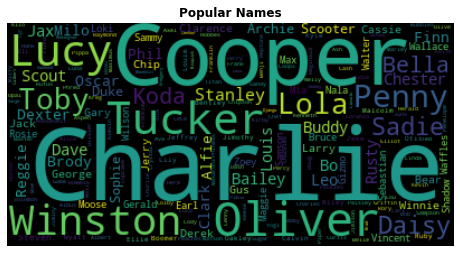

In [53]:
plt.subplots(figsize=(8, 6))
counts = df4['name'].value_counts()
wc443 = WordCloud().generate_from_frequencies(counts)
counts.index = counts.index.map(str)
plt.imshow(wc443, interpolation="bilinear")
plt.axis('off')
plt.title('Popular Names', fontweight='bold');

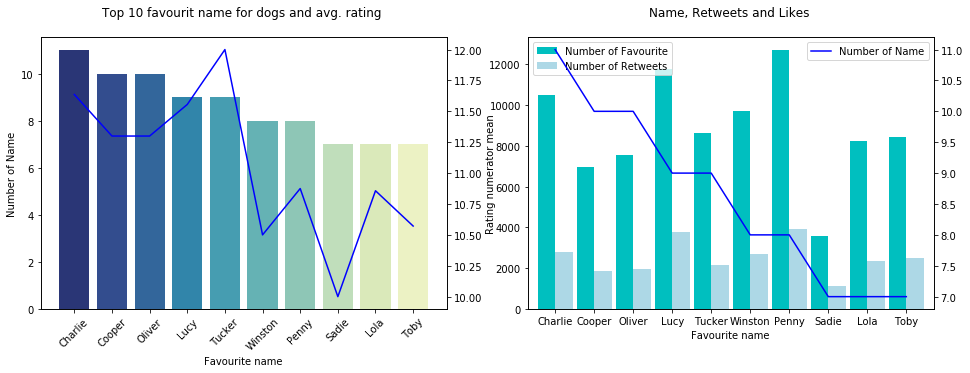

In [54]:
#data = pd.DataFrame({ 'Number of Name': df6.rating_numerator_count,
#                    'Rating numerator mean': df6.rating_numerator_mean,
#                  'Favourite name': df6.name_ }).set_index('Favourite name')
data  = pd.DataFrame({'Number of Name': df6.rating_numerator_count,
                    'Number of Favourite': df6.favorite_count_mean,
                   'Rating numerator mean': df6.rating_numerator_mean,
                   'Number of Retweets': df6.retweet_count_mean,
                  'Favourite name': df6.name_ }).set_index('Favourite name').sort_values('Number of Name', ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (16,5))
pal = sns.color_palette("YlGnBu", len(data))
chart=sns.barplot(x=data.index, y=df6.rating_numerator_count, palette=np.array(pal[::-1]), label ='Number of Name',ax=axes[0])
chart2= data['Rating numerator mean'].plot(secondary_y=True, color='b', ax=axes[0])
chart2.set_ylabel('Rating numerator mean')
chart.set_ylabel('Number of Name')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title("Top 10 favourit name for dogs and avg. rating \n", loc='center', fontsize=12, fontweight=0)

a=data[['Number of Favourite','Number of Retweets']].plot.bar(color=['c','lightblue'],width=0.9, ax=axes[1])
data['Number of Name'].plot(secondary_y=True, color='blue',ax=axes[1])

plt.xticks( rotation=60,fontsize = 10 )
plt.title("Name, Retweets and Likes \n", 
          loc='center', fontsize=12, fontweight=0)
plt.legend(loc='upper right')
a.legend(loc='upper left');


**Conclusion 1:**
> With the charts we can see that Charlie is the most poplular name of dogs posted on twitter. Following are the name Cooper ad Oliver. However, along with the name it seems that no clue for relationship betweet name of dogs with the number of `favourite_count` and the number of retweet `retweet_count`.
<a id='9'></a>
## Question 2: Stage  and its relationship with tweet number, favorite_count and retweet

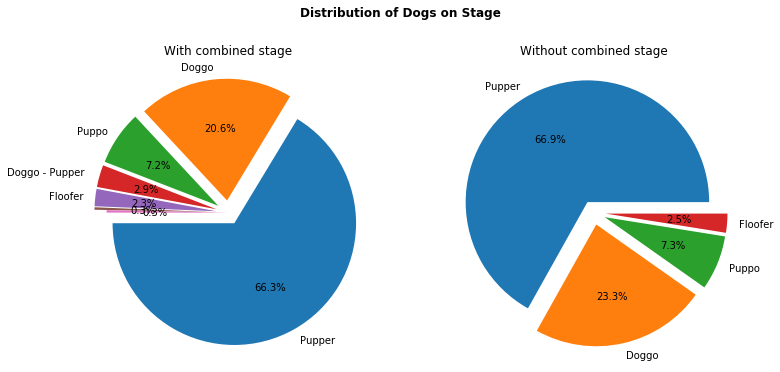

In [55]:
df_stage_pie_x = df4.copy()
df_stage_pie_x['stage'] = df_stage_pie_x['stage'].replace('', np.nan)
# make figure and assign axis objects
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121)

# pie chart parameters
ratios = list(df_stage_pie_x.stage.value_counts())
labels = [ 'Pupper', 'Doggo', 'Puppo','Doggo - Pupper ','Floofer','','']
explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1,0]
# rotate so that first wedge is split by the x-axis
angle = -180 * ratios[0]
ax1.pie(ratios,  startangle=angle, labels=labels, explode=explode, autopct='%1.1f%%')
ax1.title.set_text ('With combined stage')

ax2 = fig.add_subplot(122)
#df_stage_pie_x[df_stage_pie_x['stage']!=''].stage.value_counts()
df_stage_pie_x['stage'].str.split( ', ',expand=True).stack().value_counts()
# pie chart parameters
ratios = list(df_stage_pie_x['stage'].str.split(', ',expand=True).stack().value_counts())
labels = [ 'Pupper', 'Doggo', 'Puppo','Floofer']
explode = [0.1, 0.1, 0.1, 0.1]
# rotate so that first wedge is split by the x-axis
angle = -180 * ratios[0]
ax2.title.set_text ('Without combined stage')
ax2.pie(ratios,  startangle=angle, labels=labels, explode=explode, autopct='%1.1f%%')

plt.suptitle("Distribution of Dogs on Stage", fontweight="bold");

In [56]:
#df5=df4[['name', 'stage', 'rating_numerator', 'rating_denominator',      'favorite_count', 'retweet_count']]
df5=df5.copy()
df5['stage'] = df5['stage'].replace('', np.nan)
df7 = df5.groupby(['stage']).agg(['mean','count']).reset_index()
df7.columns=df7.columns.map('_'.join)
df7=df7.sort_values('favorite_count_count', ascending = False).head(10)
df7=df7.drop(columns=['retweet_count_count','favorite_count_count'])

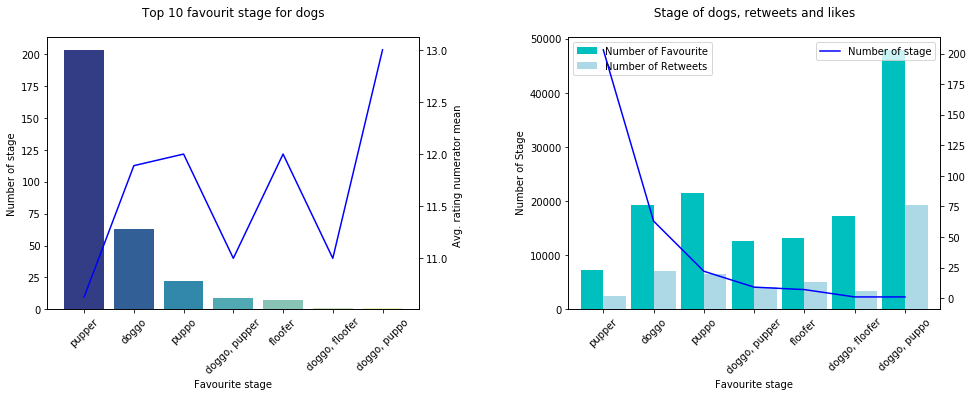

In [57]:
data  = pd.DataFrame({'Number of stage': df7.rating_numerator_count,
                    'Number of Favourite': df7.favorite_count_mean,
                   'Rating numerator mean': df7.rating_numerator_mean,
                   'Number of Retweets': df7.retweet_count_mean,
                  'Favourite stage': df7.stage_ }).set_index('Favourite stage').sort_values('Number of stage', ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (16,5))
pal = sns.color_palette("YlGnBu", len(data))
chart=sns.barplot(x=data.index, y=df7.rating_numerator_count, palette=np.array(pal[::-1]), label ='Number of stage',ax=axes[0])
chart2= data['Rating numerator mean'].plot(secondary_y=True, color='b', ax=axes[0])
chart2.set_ylabel('Rating numerator mean')
chart.set_ylabel('Number of stage')
chart2.set_ylabel('Avg. rating numerator mean ')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title("Top 10 favourit stage for dogs\n", loc='center', fontsize=12, fontweight=0)

a=data[['Number of Favourite','Number of Retweets']].plot.bar(color=['c','lightblue'],width=0.9, ax=axes[1])
b=data['Number of stage'].plot(secondary_y=True, color='blue',ax=axes[1])
plt.title(" Stage of dogs, retweets and likes \n", 
          loc='center', fontsize=12, fontweight=0)
plt.legend(loc='upper right')
a.set_ylabel('\n Number of Avg. count')
a.set_ylabel('\n Number of Stage')
a.set_xticklabels(a.get_xticklabels(), rotation=45)
a.legend(loc='upper left')
fig.subplots_adjust(hspace=0.4, wspace=0.4);


**Conclusion 2:**
> Pupper is the most favourite stage being posted on Twitter with ca. 66%. Followings are doggo and puppo. 
> Interesstingly is that although pupper are posted mostly on Twitter, its `avg.rating` is the lowest and the `favourite_count` and `retweet_cout` as well. In contrast with `doggo, puppo` such kind of dogs have the highest amount of rating as well `favourite_count` and `retweet_count` no matter when they stay alone or are grouped together.
<a id='10'></a>
## Question 3: Favourite breed? Its relationship with rating_numerator, favorite_count, retweet_count

In [58]:
df5=df4[['name', 'stage', 'breed_prediction','rating_numerator', 'rating_denominator',
       'favorite_count', 'retweet_count']]
df8 = df5.groupby(['breed_prediction']).agg(['mean','count']).reset_index()
df8.columns=df8.columns.map('_'.join)
df8=df8.sort_values('favorite_count_count', ascending = False).head(15)
df8=df8.drop(columns=['retweet_count_count','favorite_count_count'])

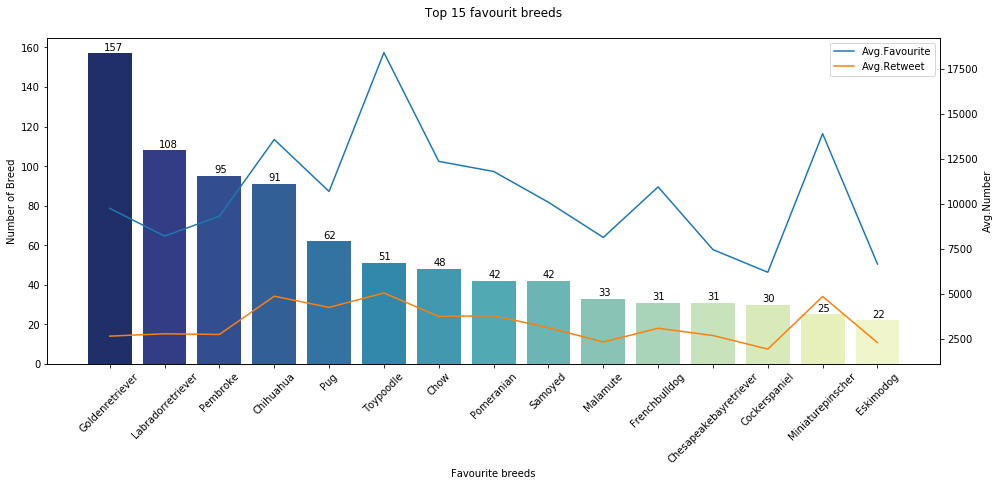

In [59]:
plt.figure(figsize=(16, 6))  
data  = pd.DataFrame({'Number of Breed': df8.rating_numerator_count,
                    'Number of Favourite': df8.favorite_count_mean,
                   'Rating numerator mean': df8.rating_numerator_mean,
                   'Avg.Number': df8.retweet_count_mean,
                  'Favourite breeds': df8.breed_prediction_}).set_index('Favourite breeds').sort_values('Number of Breed', ascending=False)
pal = sns.color_palette("YlGnBu", len(data))
chart=sns.barplot(x=data.index, y='Number of Breed',data=data, palette=np.array(pal[::-1]), label ='Number')
chart1 = chart.twinx()
chart1=sns.lineplot(x=data.index, y=df8.favorite_count_mean, palette=np.array(pal[::-1]), label ='Avg.Favourite')
chart1=sns.lineplot(x=data.index, y= 'Avg.Number', data=data, palette=np.array(pal[::-1]),label ='Avg.Retweet')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title(" Top 15 favourit breeds \n", loc='center', fontsize=12, fontweight=0)
for p in chart.patches:
    chart.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+1.5))

**Conclusion 3:**
> The chart shows Golden Retriever as the most posted breed on Twitter. However, this kind of dog gains not much interrests from people due to its low `favourite_count` and `retweet_count`. The same are Labrador and Pembroke. The ones gain the most attention are Toy Poodle and Miniature Pinscher dogs respectively. Out of them, Chihuahua is also a most-liked dog with the number of tweet, `favourite_count` and `retweet_count` at the top 3.
<a id='11'></a>
## Question 4: Relationship between Favorite_Count, Retweet_Count &Rating_numerator

Text(0.5, 1.01, 'Favorite & Retweet Distribution & Relation ')

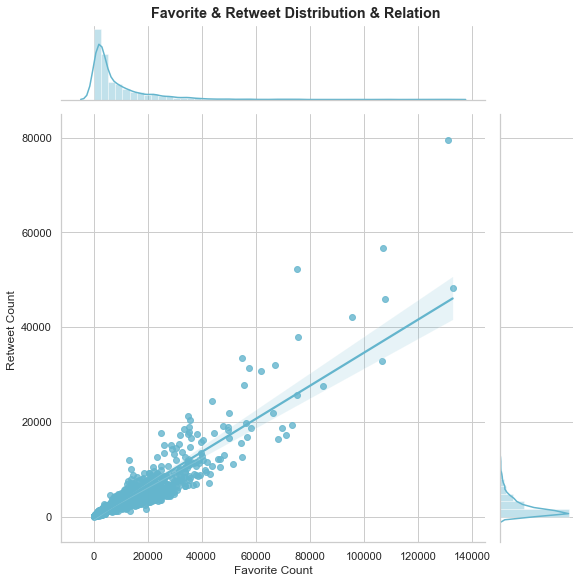

In [60]:
#https://seaborn.pydata.org/generated/seaborn.jointplot.html
sns.set(style='whitegrid')
ax442 = sns.jointplot(x=df4['favorite_count'], y=df4['retweet_count'],
                      kind='reg', color='c',  height=8)
ax442.set_axis_labels("Favorite Count", "Retweet Count ")
plt.suptitle('Favorite & Retweet Distribution & Relation ',   fontweight='bold', y=1.01)

Text(0.5, 1.01, 'Relation between Rating and Favourite Count and Retweet Count')

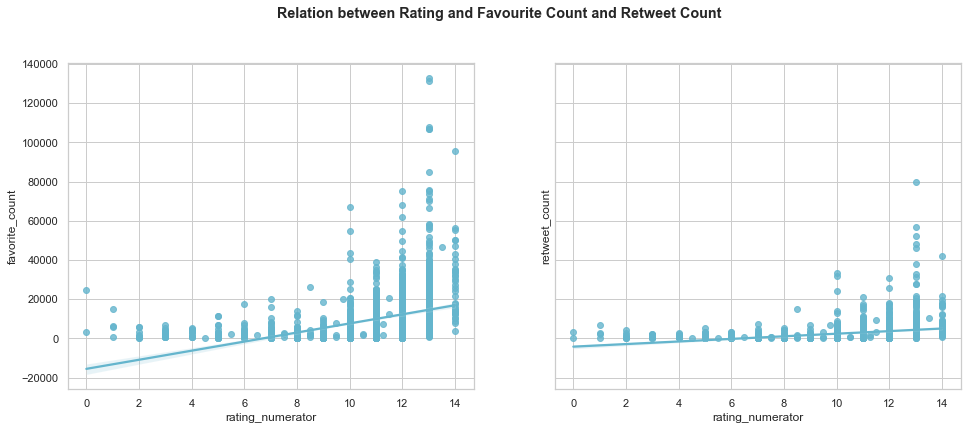

In [61]:
#https://seaborn.pydata.org/generated/seaborn.jointplot.html
sns.set(style='whitegrid')
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,6),sharey=True)
ax1 = sns.regplot(x=df4['rating_numerator'], y=df4['favorite_count'],color ='c', ax=ax1)
ax2 = sns.regplot(x=df4['rating_numerator'], y=df4['retweet_count'],color='c', ax=ax2)
plt.suptitle('Relation between Rating and Favourite Count and Retweet Count',   fontweight='bold', y=1.01)

**Conclusion 4:**
 > These charts shows a good clue to see that there are tight relationship between `favourite_count`, `retweet_count` and `rating_numerator`. Und such of these pair relationship are positive and quite strong, particularly the relationship betweet `favourtite_count` and `retweet_count`.
 <a id='12'></a>
 ## Question 5: Which time are tweets  posted or retweeted, or liked?

In [62]:
import calendar
tweets_data_lite['timestamp'] = pd.to_datetime(tweets_data_lite['timestamp'])
df44=df4.copy()
#get the month out of the timestamp
df44["Months"] = df44["timestamp"].dt.month_name()
#get the year out of the timestamp
df44["Year"] = df44["timestamp"].apply(lambda x: x.year)
#get the hour out of the timestamp
df44["hour"] = df44["timestamp"].apply(lambda x: x.hour)
df44["day_of_week"] = df44["timestamp"].dt.day_name()


In [63]:
df51 = df44.groupby('day_of_week').mean().favorite_count.reset_index()
df52 = df44.groupby('day_of_week').mean().retweet_count.reset_index()
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
mapping = {day: i for i, day in enumerate(weekdays)}
key = df51['day_of_week'].map(mapping)    
df51 = df51.iloc[key.argsort()]
df52 = df52.iloc[key.argsort()]

df61= df44.groupby('Months').mean().favorite_count.reset_index()
df62=df44.groupby('Months').mean().retweet_count.reset_index()
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']
mapping = {month: i for i, month in enumerate(months)}
key1 = df61['Months'].map(mapping)    
df61 = df61.iloc[key1.argsort()]
df62 = df62.iloc[key1.argsort()]

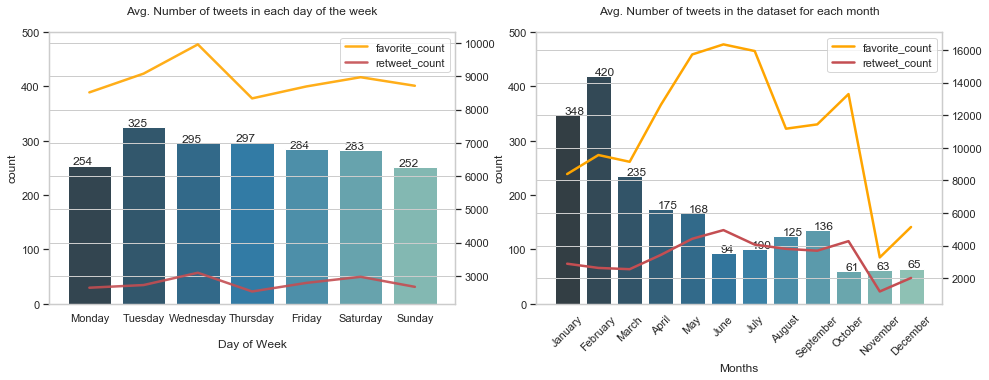

In [64]:
#https://stackoverflow.com/questions/33179122/seaborn-countplot-with-frequencies
fig, axes = plt.subplots(1,2, figsize = (16,5))
ax1 = sns.countplot(  x = "day_of_week",data = df44, palette = "YlGnBu_d", ax=axes[0])
df51.plot(x = "day_of_week", color='orange', linewidth=2.5, alpha=0.9,secondary_y=True,ax=axes[0])
df52.plot(x = "day_of_week", color='r', linewidth=2.5, alpha=0.9,secondary_y=True,ax=axes[0])
ax1.set_title("Avg. Number of tweets in each day of the week\n");
ax1.set_xlabel('\nDay of Week\n')
plt.legend(loc=1, ncol=1)
ax1.get_legend().remove()
ax1.set_ylim(0, 500)
for p in ax1.patches:
    ax1.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+2))

ax2 = sns.countplot( x = "Months", data = df44, palette = "YlGnBu_d",ax=axes[1])
df61.plot(x = "Months", color='orange', linewidth=2.5, secondary_y=True,ax=axes[1])
df62.plot(x = "Months", color='r', linewidth=2.5, secondary_y=True,ax=axes[1])
plt.legend(loc=1, ncol=1)
ax2.set_title("Avg. Number of tweets in the dataset for each month\n");
ax2.set_ylim(0, 500)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax2.get_legend().remove()
for p in ax2.patches:
    ax2.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+1.5))

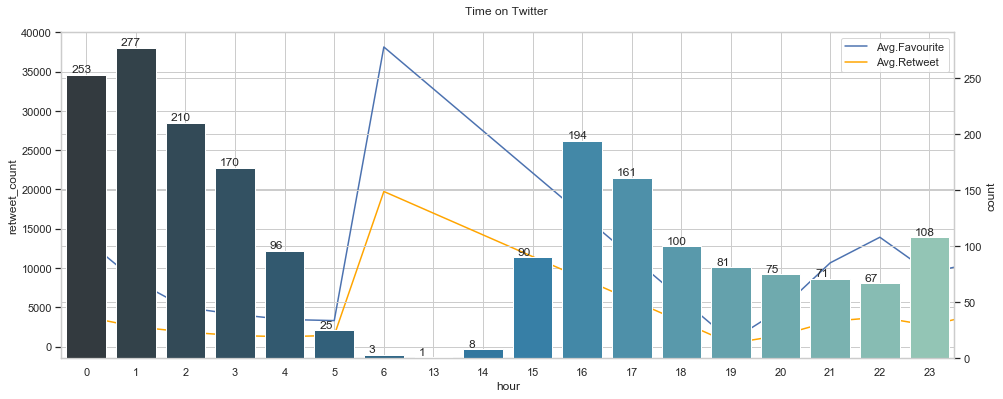

In [65]:
df71= df44.groupby('hour').mean().favorite_count.reset_index()
df72= df44.groupby('hour').mean().retweet_count.reset_index()

plt.figure(figsize=(16, 6)) 
pal = sns.color_palette("YlGnBu", len(data))


chart1=sns.lineplot(x = "hour", y= 'favorite_count', data=df71, color='b', label ='Avg.Favourite')
chart1=sns.lineplot(x = "hour", y= 'retweet_count', data=df72, color='orange',label ='Avg.Retweet')
ax1 = chart1.twinx()
ax1 = sns.countplot(x = "hour", data = df44, palette = "YlGnBu_d")
plt.title("Time on Twitter \n", loc='center', fontsize=12, fontweight=0)

#ax1.set_ylim(0, 500)
for p in ax1.patches:
    ax1.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+2))
    


**Conclusion 5:**
> The data shows that people tweet at most in Januar and Febuary. From Octorber until December are the months recording the lowest avg.number of tweets. However they retweet top at Juni when the number of tweet is lowest.

> Another interresting thing is that in 1 week, instead of weekend, people tend to tweet on Tuesday and then the number of retweet and favourite_count reachs peak at Wednesday

> Meanwhile, people tend to tweet on Twitter at the night and in the afternoon, particular at 1.00 o'clock at night and at 4.pm. From 6.00 o'clock to 14.00 o'clock, there are no count of tweet to be reported. In contrast, the favorite_ count and retweet_count are still documented. The chart shows at 6 a.m, the number of favourite_count and retweet are dramatically increased, then gradually decreased untill 19.00, then increased again.  

<a id='conclusions'></a>
## 4.Conclusion:

The data gives us a very interesting view about the dogs and the way people using twitter.
At this project, we have a chance to collect data from web. And doing some challenging data cleaning, then making some interesting analysis. Fortunately, some question we want to know, we can find it from the data after wrangling.

### Some interesting pictures

In [66]:
def show_pic(column=None, method='max', tweet_id=None):
    if method == 'max':
        row = df4.loc[[df4[column].idxmax()]]
    elif method == 'min':
        row = df4.loc[[df4[column].idxmin()]] 
    else:
        print('Invalid input... ')
        
    url = row['jpg_url'].to_string(index=False)
    img = Image.open(requests.get(url, stream=True).raw)
    display(img)
    display(row['text'])

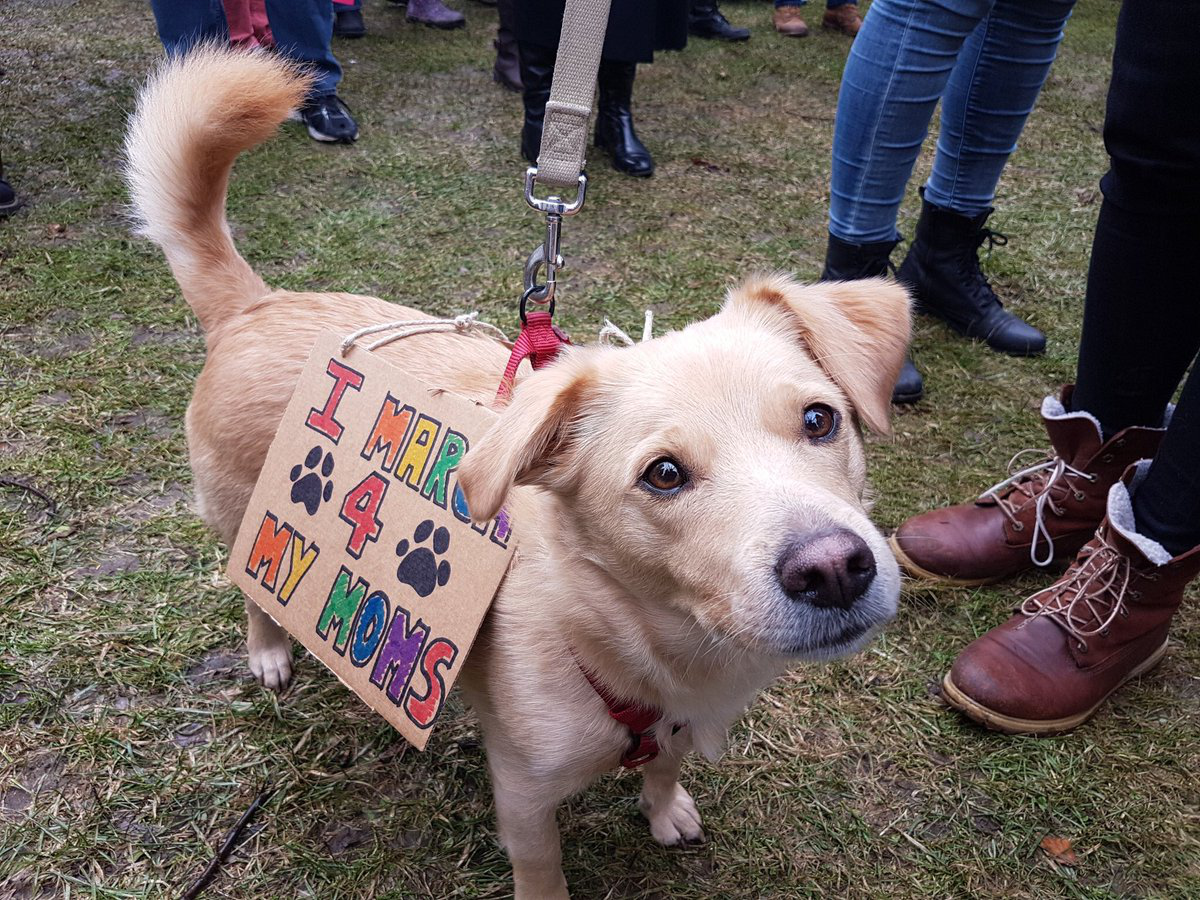

1744    Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc
Name: text, dtype: object

,tweet_id,timestamp,text,name,breed_prediction,is_one_dog,stage,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,jpg_url,retweeted_status_id
1744,822872901745569793,2017-01-21 18:26:02,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,NaN,Lakelandterrier,True,puppo,13.00,10.00,132810.00,48265.00,1,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,nan


In [67]:
show_pic(column='favorite_count', method='max')
df4.loc[[df4['favorite_count'].idxmax()]]

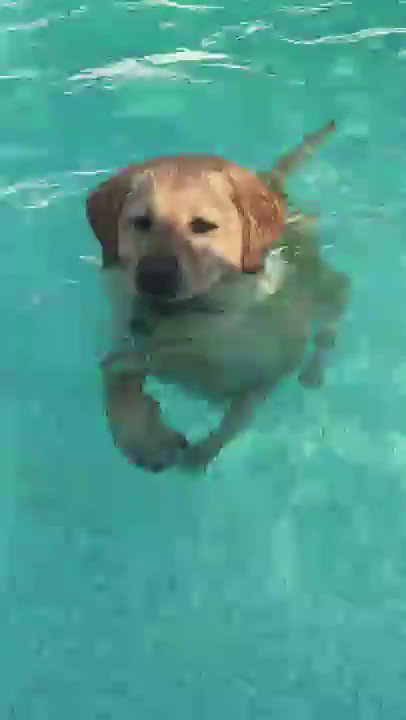

1221    Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4
Name: text, dtype: object

,tweet_id,timestamp,text,name,breed_prediction,is_one_dog,stage,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,jpg_url,retweeted_status_id
1221,744234799360020481,2016-06-18 18:26:18,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,NaN,Labradorretriever,True,doggo,13.00,10.00,131075.00,79515.00,1,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,nan


In [68]:
show_pic(column='retweet_count', method='max')
df4.loc[[df4['retweet_count'].idxmax()]]